# Sharpe Ratio and Portfolio Values

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime


In [11]:
from pandas_datareader import data as pdr

In [64]:
import yfinance as yf
yf.pdr_override()
#voo,aapl,znga,dis,tsla,brkb,dal,jll,qqq,su,gm,vgt,bio,rya,btc,eth
voo = pdr.get_data_yahoo("VOO", start="2019-01-01", end="2020-10-22")
aapl = pdr.get_data_yahoo("AAPL", start="2019-01-01", end="2020-10-22")
znga = pdr.get_data_yahoo("ZNGA", start="2019-01-01", end="2020-10-22")
dis = pdr.get_data_yahoo("DIS", start="2019-01-01", end="2020-10-22")
tsla = pdr.get_data_yahoo("TSLA", start="2019-01-01", end="2020-10-22")
brkb = pdr.get_data_yahoo("BRK-B", start="2019-01-01", end="2020-10-22")
dal = pdr.get_data_yahoo("DAL", start="2019-01-01", end="2020-10-22")
jll = pdr.get_data_yahoo("JLL", start="2019-01-01", end="2020-10-22")
qqq = pdr.get_data_yahoo("QQQ", start="2019-01-01", end="2020-10-22")
su = pdr.get_data_yahoo("SU", start="2019-01-01", end="2020-10-22")
gm = pdr.get_data_yahoo("GM", start="2019-01-01", end="2020-10-22")
vgt = pdr.get_data_yahoo("VGT", start="2019-01-01", end="2020-10-22")
bio = pdr.get_data_yahoo("BIO", start="2019-01-01", end="2020-10-22")
rya = pdr.get_data_yahoo("RYAAY", start="2019-01-01", end="2020-10-22")
btc = pdr.get_data_yahoo("BTC-USD", start="2019-01-01", end="2020-10-22")
eth = pdr.get_data_yahoo("ETH-USD", start="2019-01-01", end="2020-10-22")


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [65]:
voo.to_csv('VOO_CLOSE')
aapl.to_csv('AAPL_CLOSE')
znga.to_csv('ZNGA_CLOSE')
dis.to_csv('DIS_CLOSE')
tsla.to_csv('TSLA_CLOSE')
brkb.to_csv('BRK-B_CLOSE')
dal.to_csv('DAL_CLOSE')
jll.to_csv('JLL_CLOSE')
qqq.to_csv('QQQ_CLOSE')
su.to_csv('SU_CLOSE')
gm.to_csv('GM_CLOSE')
vgt.to_csv('VGT_CLOSE')
bio.to_csv('BIO_CLOSE')
rya.to_csv('RYAAY_CLOSE')
btc.to_csv('BTC-USD_CLOSE')
eth.to_csv('ETH-USD_CLOSE')
#voo,aapl,znga,dis,tsla,brkb,dal,jll,qqq,su,gm,vgt,bio,rya,btc,eth


In [ ]:
# aapl.columns[5]

In [66]:
znga

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-12-31,3.90,3.97,3.85,3.93,3.93,10814800
2019-01-02,3.90,4.05,3.89,3.98,3.98,16053600
2019-01-03,3.95,4.04,3.87,3.92,3.92,12025500
2019-01-04,4.00,4.08,3.94,4.02,4.02,13673500
2019-01-07,4.01,4.15,3.99,4.07,4.07,16605700
...,...,...,...,...,...,...
2020-10-15,9.30,9.34,9.15,9.18,9.18,13501800
2020-10-16,9.22,9.28,9.15,9.16,9.16,9486000
2020-10-19,9.20,9.30,8.98,8.99,8.99,12065600


In [67]:
znga.iloc[0]['Adj Close']

3.930000066757202

In [ ]:
znga

In [68]:
for stock_df in (voo,aapl,znga,dis,tsla,brkb,dal,jll,qqq,su,gm,vgt,bio,rya,btc,eth):
    stock_df['Normed Return'] = stock_df['Adj Close']/stock_df.iloc[0]['Adj Close']

In [69]:
for stock_df,allo in zip([voo,aapl,znga,dis,tsla,brkb,dal,jll,qqq,su,gm,vgt,bio,rya,btc,eth],[.0625,.0625,.0625,.0625,.0625,.0625,.0625,.0625,.0625,.0625,.0625,.0625,.0625,.0625,.0625,.0625]):
    stock_df['Allocation'] = stock_df['Normed Return']*allo

In [70]:
znga.tail()

,Open,High,Low,Close,Adj Close,Volume,Normed Return,Allocation
Date,,,,,,,,
2020-10-15,9.30,9.34,9.15,9.18,9.18,13501800,2.335878,0.145992
2020-10-16,9.22,9.28,9.15,9.16,9.16,9486000,2.330789,0.145674
2020-10-19,9.20,9.30,8.98,8.99,8.99,12065600,2.287532,0.142971
2020-10-20,9.02,9.10,8.90,8.98,8.98,10663700,2.284987,0.142812
2020-10-21,9.04,9.22,9.03,9.11,9.11,15850100,2.318066,0.144879


## Normalize Prices

This is the same as cumulative daily returns

In [71]:
for stock_df in [voo,aapl,znga,dis,tsla,brkb,dal,jll,qqq,su,gm,vgt,bio,rya,btc,eth]:
    stock_df['Position Values'] = stock_df['Allocation']*4000



In [72]:
aapl

,Open,High,Low,Close,Adj Close,Volume,Normed Return,Allocation,Position Values
Date,,,,,,,,,
2018-12-31,39.632500,39.840000,39.119999,39.435001,38.585068,140014000,1.000000,0.062500,250.000000
2019-01-02,38.722500,39.712502,38.557499,39.480000,38.629097,148158800,1.001141,0.062571,250.285274
2019-01-03,35.994999,36.430000,35.500000,35.547501,34.781353,365248800,0.901420,0.056339,225.355008
2019-01-04,36.132500,37.137501,35.950001,37.064999,36.266144,234428400,0.939901,0.058744,234.975250
2019-01-07,37.174999,37.207500,36.474998,36.982498,36.185429,219111200,0.937809,0.058613,234.452281
...,...,...,...,...,...,...,...,...,...
2020-10-15,118.720001,121.199997,118.150002,120.709999,120.709999,112559200,3.128412,0.195526,782.103066
2020-10-16,121.279999,121.550003,118.809998,119.019997,119.019997,115393800,3.084613,0.192788,771.153218
2020-10-19,119.959999,120.419998,115.660004,115.980003,115.980003,120639300,3.005826,0.187864,751.456523


In [73]:
portfolio_val = pd.concat([voo['Position Values'],aapl['Position Values'],
                                                  znga['Position Values'],
                                                  dis['Position Values'],
                                                  tsla['Position Values'],
                                                  brkb['Position Values'],
                                                  dal['Position Values'],
                                                  jll['Position Values'], 
                                                  qqq['Position Values'],
                                                  su['Position Values'],
                                                  gm['Position Values'],
                                                  vgt['Position Values'],
                                                  bio['Position Values'],                                                    
                                                  rya['Position Values'],
                                                  btc['Position Values'], 
                                                  eth['Position Values']], axis=1,)

                                                    






In [74]:
portfolio_val.head()

,Position Values,Position Values,Position Values,Position Values,Position Values,Position Values,Position Values,Position Values,Position Values,Position Values,Position Values,Position Values,Position Values,Position Values,Position Values,Position Values
Date,,,,,,,,,,,,,,,,
2018-12-31,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
2019-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,256.734414,263.967230
2019-01-02,250.195858,250.285274,253.180658,248.449627,232.962742,248.310327,250.951904,253.021343,251.004805,252.681419,251.420036,250.149860,245.543020,251.927401,263.406696,290.638251
2019-01-03,244.223515,225.355008,249.363868,242.430462,225.631013,234.670402,228.507012,240.699038,242.804378,252.055750,241.031411,237.786974,241.473605,247.511918,256.281612,279.554891
2019-01-04,252.284525,234.975250,255.725185,249.908793,238.649341,239.004805,239.428862,251.560031,253.192648,262.066505,249.103138,248.126824,243.605199,255.186443,257.682761,289.765209


In [ ]:
#voo,aapl,znga,dis,tsla,brkb,dal,jll,qqq,su,gm,vgt,bio,rya,btc,eth

In [ ]:
portfolio_val.head()

In [76]:
portfolio_val.columns = ['VOO Pos','AAPL Pos','ZNGA Pos','DIS Pos','TSLA Pos','BRK-B Pos'
                         ,'DAL Pos','JLL Pos','QQQ Pos','SU Pos','GM Pos','VGT Pos',
                         'BIO Pos','RYAAY Pos','BTC-USD Pos','ETH-USD Pos']

In [ ]:
'''brkb.to_csv('BRK-B_CLOSE')
dal.to_csv('DAL_CLOSE')
jll.to_csv('JLL_CLOSE')
qqq.to_csv('QQQ_CLOSE')
su.to_csv('SU_CLOSE')
gm.to_csv('GM_CLOSE')
vgt.to_csv('VGT_CLOSE')
bio.to_csv('BIO_CLOSE')
rya.to_csv('RYAAY_CLOSE')
btc.to_csv('BTC-USD_CLOSE')
eth.to_csv('ETH-USD_CLOSE')
'''

In [77]:
portfolio_val.head()

,VOO Pos,AAPL Pos,ZNGA Pos,DIS Pos,TSLA Pos,BRK-B Pos,DAL Pos,JLL Pos,QQQ Pos,SU Pos,GM Pos,VGT Pos,BIO Pos,RYAAY Pos,BTC-USD Pos,ETH-USD Pos
Date,,,,,,,,,,,,,,,,
2018-12-31,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
2019-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,256.734414,263.967230
2019-01-02,250.195858,250.285274,253.180658,248.449627,232.962742,248.310327,250.951904,253.021343,251.004805,252.681419,251.420036,250.149860,245.543020,251.927401,263.406696,290.638251
2019-01-03,244.223515,225.355008,249.363868,242.430462,225.631013,234.670402,228.507012,240.699038,242.804378,252.055750,241.031411,237.786974,241.473605,247.511918,256.281612,279.554891
2019-01-04,252.284525,234.975250,255.725185,249.908793,238.649341,239.004805,239.428862,251.560031,253.192648,262.066505,249.103138,248.126824,243.605199,255.186443,257.682761,289.765209


In [78]:
portfolio_val['Total Pos'] = portfolio_val.sum(axis=1)

In [79]:
portfolio_val.tail()

,VOO Pos,AAPL Pos,ZNGA Pos,DIS Pos,TSLA Pos,BRK-B Pos,DAL Pos,JLL Pos,QQQ Pos,SU Pos,GM Pos,VGT Pos,BIO Pos,RYAAY Pos,BTC-USD Pos,ETH-USD Pos,Total Pos
Date,,,,,,,,,,,,,,,,,
2020-10-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,758.683586,691.423687,1450.107273
2020-10-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,767.050393,708.964886,1476.015280
2020-10-19,353.768872,751.456523,571.882927,286.703697,1618.201632,255.889427,163.220655,217.017691,465.524379,114.157279,262.902930,491.060133,596.783249,294.119725,784.329210,712.192648,7939.210977
2020-10-20,355.165154,761.369676,571.246781,288.365331,1584.810764,257.199536,165.707825,218.429737,466.525004,115.317216,280.640010,491.687740,605.654136,298.009550,795.971729,691.950378,7948.050568
2020-10-21,354.523302,757.222998,579.516508,292.242513,1587.440017,257.346459,163.220655,219.563351,466.164130,111.257431,281.980161,489.927403,602.262929,294.925736,856.580006,735.163561,8049.337160


In [80]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Total Portfolio Value')

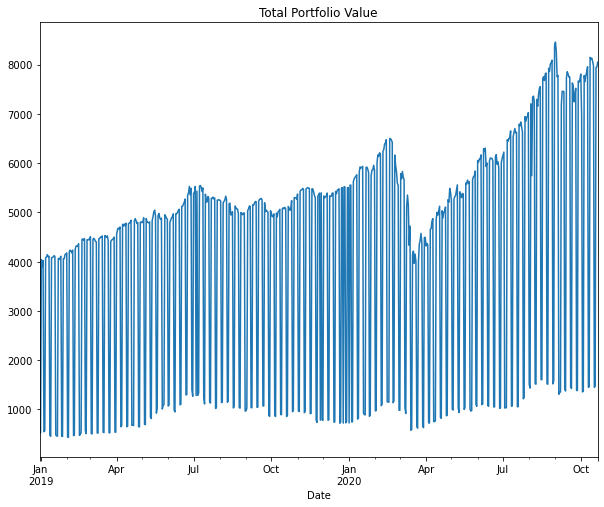

In [81]:
portfolio_val['Total Pos'].plot(figsize=(10,8))
plt.title('Total Portfolio Value')

<AxesSubplot:xlabel='Date'>

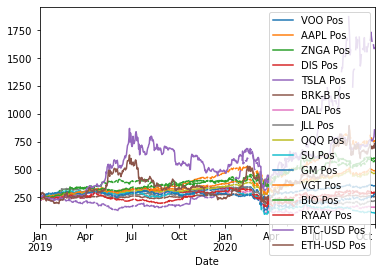

In [82]:
portfolio_val.drop('Total Pos',axis=1).plot(kind='line')

In [83]:
portfolio_val.tail()

,VOO Pos,AAPL Pos,ZNGA Pos,DIS Pos,TSLA Pos,BRK-B Pos,DAL Pos,JLL Pos,QQQ Pos,SU Pos,GM Pos,VGT Pos,BIO Pos,RYAAY Pos,BTC-USD Pos,ETH-USD Pos,Total Pos
Date,,,,,,,,,,,,,,,,,
2020-10-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,758.683586,691.423687,1450.107273
2020-10-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,767.050393,708.964886,1476.015280
2020-10-19,353.768872,751.456523,571.882927,286.703697,1618.201632,255.889427,163.220655,217.017691,465.524379,114.157279,262.902930,491.060133,596.783249,294.119725,784.329210,712.192648,7939.210977
2020-10-20,355.165154,761.369676,571.246781,288.365331,1584.810764,257.199536,165.707825,218.429737,466.525004,115.317216,280.640010,491.687740,605.654136,298.009550,795.971729,691.950378,7948.050568
2020-10-21,354.523302,757.222998,579.516508,292.242513,1587.440017,257.346459,163.220655,219.563351,466.164130,111.257431,281.980161,489.927403,602.262929,294.925736,856.580006,735.163561,8049.337160


## Total Portfolio Value

# Portfolio Statistics
### Daily Returns

In [84]:
portfolio_val['Daily Return'] = portfolio_val['Total Pos'].pct_change(1)

In [ ]:
### Cumulative Return

In [86]:
cum_ret = 100 * (portfolio_val['Total Pos'][-1]/portfolio_val['Total Pos'][0] -1 )
print('Our return was {} percent!'.format(cum_ret))

Our return was 101.23342900507066 percent!


### Avg Daily Return

In [87]:
portfolio_val['Daily Return'].mean()

0.6532144007029856

### Std Daily Return

In [88]:
portfolio_val['Daily Return'].std()

1.9924212125649148

<AxesSubplot:ylabel='Frequency'>

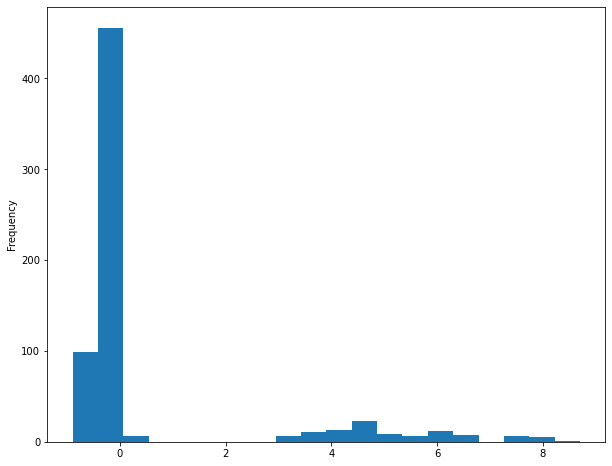

In [89]:
portfolio_val['Daily Return'].plot(kind='hist', bins=20, figsize=(10,8))

# Sharpe Ratio

The Sharpe Ratio is a measure for calculating risk-adjusted return, and this ratio has become the industry standard for such calculations. 

Sharpe ratio = (Mean portfolio return − Risk-free rate)/Standard deviation of portfolio return

The original Sharpe Ratio

Annualized Sharpe Ratio = K-value * SR

K-values for various sampling rates:

* Daily = sqrt(252)
* Weekly = sqrt(52)
* Monthly = sqrt(12)

Since I'm based in the USA, I will use a very low risk-free rate (the rate you would get if you just put your money in a bank, its currently very low in the USA, let's just say its ~0% return). If you are in a different country with higher rates for your trading currency, you can use this trick to convert a yearly rate with a daily rate:

daily_rate = ((1.0 + yearly_rate)**(1/252))-1

Other values people use are things like the 3-month treasury bill or [LIBOR](http://www.investopedia.com/terms/l/libor.asp).

Read more: Sharpe Ratio http://www.investopedia.com/terms/s/sharperatio

In [90]:
SR = portfolio_val['Daily Return'].mean()/portfolio_val['Daily Return'].std()

In [91]:
SR

0.32784955138179817

In [92]:
ASR = (252**0.5)*SR

In [93]:
ASR

5.204450282401982

In [94]:
portfolio_val['Daily Return'].std()

1.9924212125649148

In [95]:
portfolio_val['Daily Return'].mean()

0.6532144007029856

<AxesSubplot:ylabel='Density'>

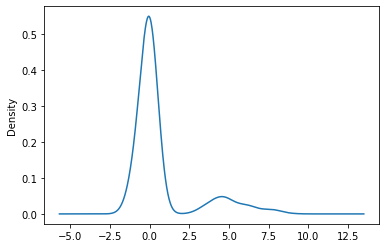

In [96]:
portfolio_val['Daily Return'].plot(kind='kde')

<AxesSubplot:ylabel='Density'>

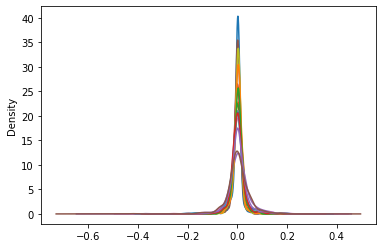

In [97]:
#voo,aapl,znga,dis,tsla,brkb,dal,jll,qqq,su,gm,vgt,bio,rya,btc,eth

voo['Adj Close'].pct_change(1).plot(kind='kde')
aapl['Adj Close'].pct_change(1).plot(kind='kde')
znga['Adj Close'].pct_change(1).plot(kind='kde')
dis['Adj Close'].pct_change(1).plot(kind='kde')
tsla['Adj Close'].pct_change(1).plot(kind='kde')
brkb['Adj Close'].pct_change(1).plot(kind='kde')
dal['Adj Close'].pct_change(1).plot(kind='kde')
jll['Adj Close'].pct_change(1).plot(kind='kde')
qqq['Adj Close'].pct_change(1).plot(kind='kde')
su['Adj Close'].pct_change(1).plot(kind='kde')
gm['Adj Close'].pct_change(1).plot(kind='kde')
vgt['Adj Close'].pct_change(1).plot(kind='kde')
bio['Adj Close'].pct_change(1).plot(kind='kde')
rya['Adj Close'].pct_change(1).plot(kind='kde')
btc['Adj Close'].pct_change(1).plot(kind='kde')
eth['Adj Close'].pct_change(1).plot(kind='kde')




In [98]:
import numpy as np
np.sqrt(252)* (np.mean(.001-0.0002)/.001)

12.699606293110037

# Great Job!